In [1]:
from DLtools.Data_preprocess import series_to_supervised,load_data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

sns.set_theme(color_codes=True)

In [2]:
#r='data/instant_data/rain_small.csv'
#w='data/instant_data/water_small.csv'
r = "data/instant_data/rain.csv"
w = 'data/instant_data/water.csv'
rw = load_data(r,w)
df =rw.df.resample('d').mean()

DataFrame shape: (833425, 1245)


In [4]:
# Normalize all
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

In [5]:
TARGET = 'CPY015_w'
## Period 2013-2015 ##
data = df.interpolate(limit=100)
data = data.astype('float32')
X = data.drop([TARGET],axis=1).fillna(0)

Y = data[TARGET].fillna(0)


In [20]:
#sns.regplot(x=col, y=TARGET, data=data)
#sns.relplot(x="ACRU_r", y=TARGET, data=data,col=);


In [68]:
# correlation 

corr_test = df.corr(method='pearson')[TARGET]
corr_test= corr_test[(corr_test> 0.5) | (corr_test< -0.5) ]
corr_test =corr_test.reset_index().rename(columns={"index":'Stations',TARGET:"Corr"})
corr_test

,Stations,Corr
0,BKK003_w,0.843683
1,BKK004_w,0.651518
2,BKK005_w,0.651956
3,BKK006_w,0.726769
4,BKK007_w,0.836907
5,BKK018_w,0.565323
6,BKK019_w,0.577452
7,BPK001_w,0.567408
8,BPK003_w,0.541273
9,CHI004_w,0.591497


# PCA

In [8]:
pca = PCA(n_components=10)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.48584703 0.07149116 0.04342089 0.03549179 0.03330577 0.02292766
 0.020486   0.01416743 0.01316441 0.01033237]
[[-2.1155963e-03  2.3230431e-03  1.8392211e-03 ...  1.3695361e-02
   6.8706796e-02  4.3973416e-02]
 [ 4.9249302e-03  8.9877671e-05  4.1197469e-03 ...  1.8814642e-02
  -2.8719248e-02  3.1363610e-02]
 [-1.2199630e-03  3.9348358e-04 -3.2786827e-03 ...  6.6495890e-04
  -3.4697127e-02  3.0200338e-02]
 ...
 [ 3.3899341e-03  1.4033531e-02  1.4586663e-02 ...  2.6165931e-03
  -2.7488094e-02 -4.5966987e-02]
 [ 1.4900932e-02  1.7559575e-02  1.0196522e-02 ...  7.6404139e-03
  -4.9918231e-02 -4.8192609e-02]
 [ 6.0821632e-03  3.7183731e-03  7.7144005e-03 ...  3.4561446e-03
   1.0693713e-01  1.3120682e-02]]


In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [10]:
# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=50)
# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, Y)

In [11]:
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 1244
Reduced number of features: 50


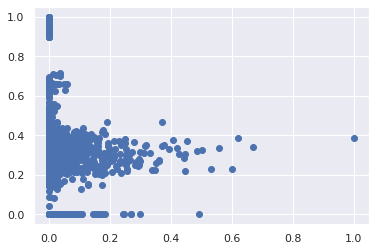

In [13]:
plt.scatter(X.iloc[:,2],Y)